# Sentiment Analysis Using Various ML Classifiers ans well as using Recurrent Neural Network

### In this notebook you will see text precessing on twitter data set and after that I have performed different Machine Learning Algorithms on the data such as **Logistic Regression, RandomForestClassifier, SVC, Naive Bayes** to classifiy positive and negative tweets. After that I have also built a RNN network which is the best fit for such textual sentiment analysis, since it's a Sequential Dataset which is requirement for RNN network.

#### Let's Dive into it.

# Index

* <a href="#1" style="color: blue;">Importing Libraries</a>
* <a href="#2" style="color: blue;">Loading Dataset</a>
* <a href="#3" style="color: blue;">Data Visualization</a>
* <a href="#4" style="color: blue;">Data Preprocessing</a>
* <a href="#5" style="color: blue;">Analyzing the Data</a>
* <a href="#6" style="color: blue;">Vectorization and Splitting the data</a>
* <a href="#7" style="color: blue;">Model Building</a>
* <a href="#8" style="color: blue;">Logistic Regression</a>
* <a href="#9" style="color: blue;">Linear SVM</a>
* <a href="#10" style="color: blue;">Random Forest</a>
* <a href="#11" style="color: blue;">Naive Bayes</a>
* <a href="#12" style="color: blue;">RNN</a>
* <a href="#13" style="color: blue;">Model Saving, Loading and Prediction</a>

# Importing libraries <a id="1"></a>

In [ ]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [ ]:
# Construct a tf.data.Dataset
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [ ]:
data = data.sample(frac=1)
data = data[:200000]

# Data Visualization <a id="3"></a>

Dataset details
target: the polarity of the tweet (0 = negative, 4 = positive)

* date : the date of the tweet (Sat May 16 23:58:44 PDT 2009)
* polarity : the polarity of the tweet (0 = negative 4 = positive)
* user : the user that tweeted (TerraScene)
* text : the text of the tweet (i'm 10x cooler than all of you)

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [ ]:
data.head(10)

,polarity,id,date,query,user,text
722084,0,2261382364,Sat Jun 20 20:42:18 PDT 2009,NO_QUERY,AdrianSpeck,Leg hurts can hardly walk
1157616,4,1979198314,Sun May 31 02:01:46 PDT 2009,NO_QUERY,makeupbylinvia,@thoughtcloud Cool that'd be awesome! Thanks....
1064123,4,1964603753,Fri May 29 14:30:11 PDT 2009,NO_QUERY,LeeAnnWalsh,@lilyroseallen sorry to keep saying
1483162,4,2067415190,Sun Jun 07 12:18:11 PDT 2009,NO_QUERY,Wildertamer23,Woke up at 11. I feel awesome
501963,0,2187369967,Mon Jun 15 20:10:55 PDT 2009,NO_QUERY,projvolunteer,Sorry for lack of updates I don't have the int...
1210662,4,1989073218,Mon Jun 01 00:15:28 PDT 2009,NO_QUERY,Lozzaquinn,@ home about todo mums hair......straightening...
1030149,4,1932884564,Tue May 26 22:27:02 PDT 2009,NO_QUERY,maxlemesh,@blindmonk ??????.. ? ??? ??? ????? ???????? ???
390866,0,2054783653,Sat Jun 06 08:04:36 PDT 2009,NO_QUERY,pulz27,apparently its too early in the day to buy a c...
798832,0,2328735351,Thu Jun 25 09:55:53 PDT 2009,NO_QUERY,SarahTolson,@Tolsonii Oooooohhhhh how sad.....
702103,0,2255294620,Sat Jun 20 11:03:02 PDT 2009,NO_QUERY,cmariewaters,i'm sad. i'm bored and nobody wants to text me...


In [ ]:
data['polarity'].unique()

array([0, 4])

In [ ]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
722084,0,2261382364,Sat Jun 20 20:42:18 PDT 2009,NO_QUERY,AdrianSpeck,Leg hurts can hardly walk
1157616,1,1979198314,Sun May 31 02:01:46 PDT 2009,NO_QUERY,makeupbylinvia,@thoughtcloud Cool that'd be awesome! Thanks....
1064123,1,1964603753,Fri May 29 14:30:11 PDT 2009,NO_QUERY,LeeAnnWalsh,@lilyroseallen sorry to keep saying
1483162,1,2067415190,Sun Jun 07 12:18:11 PDT 2009,NO_QUERY,Wildertamer23,Woke up at 11. I feel awesome
501963,0,2187369967,Mon Jun 15 20:10:55 PDT 2009,NO_QUERY,projvolunteer,Sorry for lack of updates I don't have the int...


In [ ]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.499785,1.997999e+09
std,0.500001,1.939121e+08
min,0.000000,1.467811e+09
25%,0.000000,1.956809e+09
50%,0.000000,2.002005e+09
75%,1.000000,2.176795e+09
max,1.000000,2.329206e+09


In [ ]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99957
No. of negative tagged sentences is: 100043


In [ ]:
# get a word count per of text
def word_count(words):
    return len(words.split())

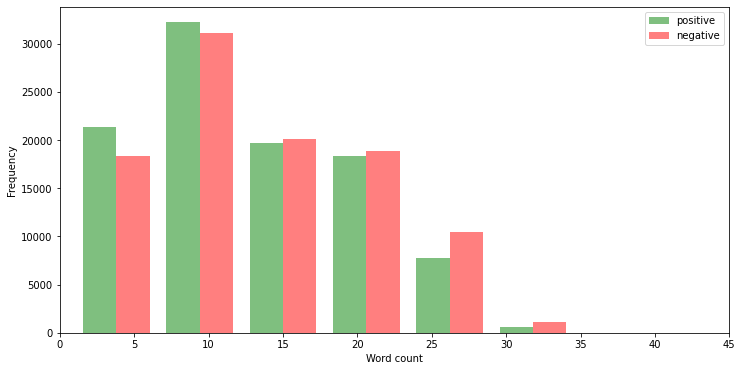

In [ ]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [ ]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 65031),
 ('and', 37047),
 ('you', 29752),
 ('for', 26809),
 ('have', 17799),
 ('that', 16119),
 ("i'm", 15666),
 ('just', 15646),
 ('but', 15592),
 ('with', 14217),
 ('was', 12847),
 ('not', 12727),
 ('this', 10911),
 ('get', 10224),
 ('good', 9673),
 ('like', 9559),
 ('are', 9541),
 ('all', 9309),
 ('out', 8738),
 ('your', 8105)]

# Data Processing <a id="4"></a>

<AxesSubplot:xlabel='polarity', ylabel='count'>

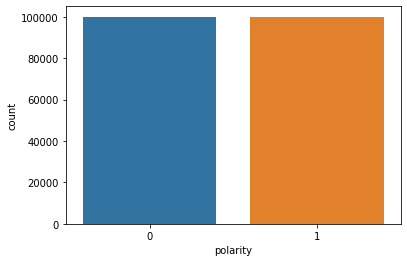

In [ ]:
%matplotlib inline
sns.countplot(data['polarity'])

In [ ]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data.head(10)

,polarity,text
722084,0,Leg hurts can hardly walk
1157616,1,@thoughtcloud Cool that'd be awesome! Thanks....
1064123,1,@lilyroseallen sorry to keep saying
1483162,1,Woke up at 11. I feel awesome
501963,0,Sorry for lack of updates I don't have the int...
1210662,1,@ home about todo mums hair......straightening...
1030149,1,@blindmonk ??????.. ? ??? ??? ????? ???????? ???
390866,0,apparently its too early in the day to buy a c...
798832,0,@Tolsonii Oooooohhhhh how sad.....
702103,0,i'm sad. i'm bored and nobody wants to text me...


In [ ]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [ ]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'you', "that'll", 'too', 'that', 'ours', 'as', 'not', 'hadn', 'don', 'needn', 'do', 'them', 'yourself', 'because', 'once', 'more', 'aren', 'by', 'both', 'how', 'mustn', 'under', 'having', 'those', 'which', "mightn't", 'against', 'didn', 'will', 'won', 've', 'are', 'did', 't', 'above', 'haven', 'few', 'such', 'weren', 'ma', 'some', 'each', "needn't", 'll', 'our', 'at', 'in', 'shan', "mustn't", 'their', 'what', 'm', 'yourselves', 'mightn', 'just', 'down', 'further', "couldn't", 'again', 'there', 'had', 'during', 'where', 'own', 'over', 'y', "wouldn't", 'whom', 'if', 'him', 'to', 'same', 'yours', 'up', "you'd", "aren't", "hasn't", 'itself', "shouldn't", 'wouldn', 'the', 'has', 'other', "she's", 'should', 'from', 'your', 'no', 'doesn', 'a', "you'll", 'his', 'an', 'can', "it's", 'who', "haven't", 'about', 'me', 'am', 'doing', 'below', 's', 'does', 'herself', 'hasn', '

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
data.head(10)

,polarity,text,processed_tweets
722084,0,Leg hurts can hardly walk,eg hurt hardly walk
1157616,1,@thoughtcloud Cool that'd be awesome! Thanks....,thoughtcloud cool thatd awesome thanks seems l...
1064123,1,@lilyroseallen sorry to keep saying,lilyroseallen sorry keep saying
1483162,1,Woke up at 11. I feel awesome,oke 11 feel awesome
501963,0,Sorry for lack of updates I don't have the int...,orry lack update dont internet home yet
1210662,1,@ home about todo mums hair......straightening...,home todo mum hairstraightening bottom layer c...
1030149,1,@blindmonk ??????.. ? ??? ??? ????? ???????? ???,blindmonk
390866,0,apparently its too early in the day to buy a c...,pparently early day buy cheeseburger
798832,0,@Tolsonii Oooooohhhhh how sad.....,tolsonii oooooohhhhh sad
702103,0,i'm sad. i'm bored and nobody wants to text me...,sad im bored nobody want text back today guess...


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

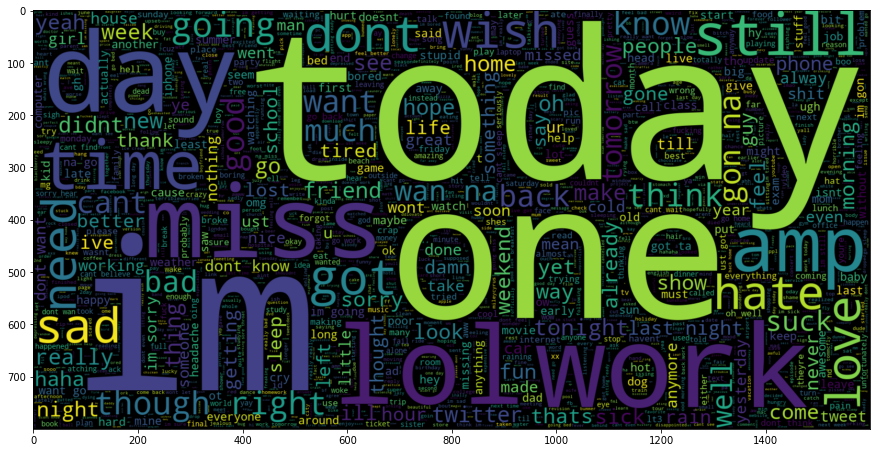

In [ ]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

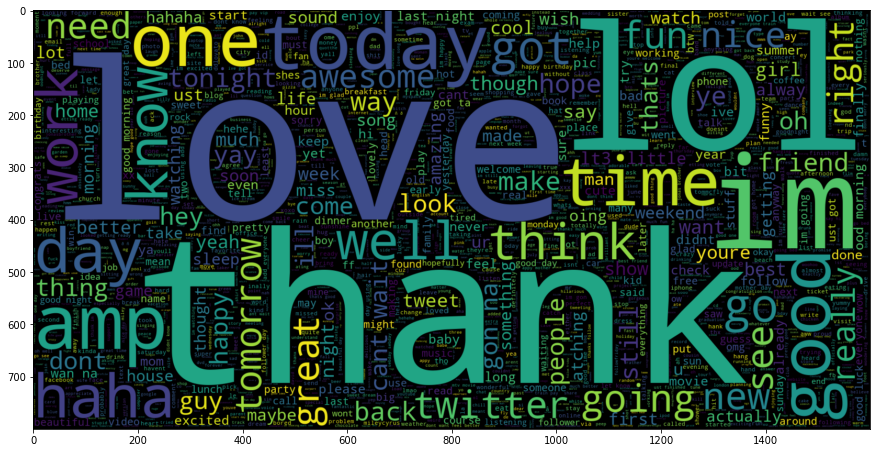

In [ ]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [ ]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [ ]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [ ]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  170137


In [ ]:
print(X.shape)
print(y.shape)

(200000, 170137)
(200000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170137)
y_train (160000,)

X_test (40000, 170137)
y_test (40000,)


# Model Building <a id="7"></a>

### Model evaluating function

In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 83.460625
Accuracy of model on testing data : 77.065 

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     19967
           1       0.76      0.79      0.78     20033

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



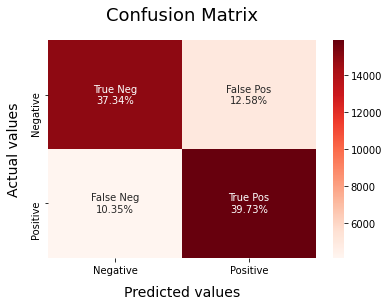

In [ ]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 93.191875
Accuracy of model on testing data : 76.0025 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     19967
           1       0.75      0.78      0.76     20033

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



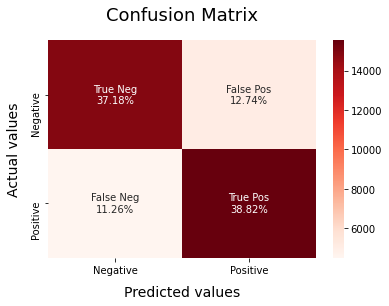

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 74.87125
Accuracy of model on testing data : 70.1975 

              precision    recall  f1-score   support

           0       0.74      0.62      0.68     19967
           1       0.67      0.78      0.72     20033

    accuracy                           0.70     40000
   macro avg       0.71      0.70      0.70     40000
weighted avg       0.71      0.70      0.70     40000



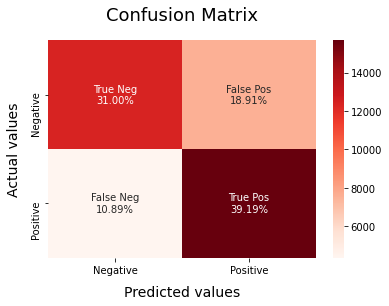

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 86.86874999999999
Accuracy of model on testing data : 75.69749999999999 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     19967
           1       0.77      0.73      0.75     20033

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



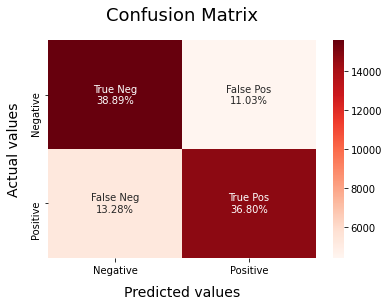

In [ ]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN <a id="12"></a>

#### What is RNN?
Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

#### Embedding Layer
Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.

#### LSTM layer
Long Short Term Memory networks, usually called “LSTMs” , were introduced by Hochreiter and Schmiduber. These have widely been used for speech recognition, language modeling, sentiment analysis and text prediction. Before going deep into LSTM, we should first understand the need of LSTM which can be explained by the drawback of practical use of Recurrent Neural Network (RNN). So, lets start with RNN.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  125 2028  463]
 [   0    0    0 ...   96 3811 1663]
 [   0    0    0 ...   61  120  578]
 ...
 [   0    0    0 ...  342  306 4215]
 [   0    0    0 ...  727  549  169]
 [   0    0    0 ...    0   32 2544]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10
5000/5000 [==============================] - 88s 17ms/step - loss: 0.5399 - accuracy: 0.7200 - val_loss: 0.4860 - val_accuracy: 0.7637

Epoch 00001: val_accuracy improved from -inf to 0.76365, saving model to rnn_model.hdf5
Epoch 2/10
5000/5000 [==============================] - 84s 17ms/step - loss: 0.4643 - accuracy: 0.7759 - val_loss: 0.4801 - val_accuracy: 0.7670

Epoch 00002: val_accuracy improved from 0.76365 to 0.76697, saving model to rnn_model.hdf5
Epoch 3/10
5000/5000 [==============================] - 82s 16ms/step - loss: 0.4486 - accuracy: 0.7840 - val_loss: 0.4806 - val_accuracy: 0.7632

Epoch 00003: val_accuracy did not improve from 0.76697
Epoch 4/10
5000/5000 [==============================] - 83s 17ms/step - loss: 0.4345 - accuracy: 0.7942 - val_loss: 0.4871 - val_accuracy: 0.7679

Epoch 00004: val_accuracy improved from 0.76697 to 0.76788, saving model to rnn_model.hdf5
Epoch 5/10
5000/5000 [==============================] - 84s 17ms/step - loss: 0.4191 - 

In [ ]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

Negative


In [ ]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Positive


In [ ]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Negative


# Model Saving, Loading and Prediction <a id="13"></a>

In [ ]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [ ]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [ ]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [ ]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())


                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
